##### Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Note:

To solve this we will go through different classification models like Logistic Regression, kNN, Naïve Bayes.With side by side comparison of these in python. It takes through a bank dataset (namely THERA Bank) with all data cleaning like removing outliers, dropping non-values(columns) adding columns, etc. and the detailed analysis (both included: Univariate and Bivariate) to get you the sense of the dataset effortlessly.

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
#from scipy import zscores   #for zscore
from sklearn.neighbors import KNeighborsClassifier #calling NNH
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [313]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights='distance')

In [314]:
df = pd.read_csv('TheraBank.csv')

In [315]:
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [316]:
# Creating a copy of dataframe for manipulations
df_Bank = df

In [317]:
#Re-adjusting the sequence of the columns. First dropping and then reading the "Personal Loan " for bringing it as the end column in the dataframe.
y= df_Bank['Personal Loan']
df_Bank.drop(['Personal Loan'], axis = 1,inplace = True)
df['Personal Loan'] = y
df_Bank.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0


#### Question 1: Read the column description and ensure you understand each attribute well

Exploring the data

In [318]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We can see that all the columns/attributes have 5000 non-null values..

In [319]:
# Check if any missing value
df_Bank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

There is No NULL value in our Data Frame

In [320]:
# Experience can't have negative values hence replacing it with median
df_Bank[df_Bank['Experience'] == -1]['Experience'].count()

33

In [321]:
df_Bank[df_Bank['Experience'] == -2]['Experience'].count()

15

In [322]:
df_Bank[df_Bank['Experience'] == -3]['Experience'].count()

4

Total of 52 negative experience values are found.. (33+15+4=52)

In [323]:
df_Bank['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
df_Bank['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
df_Bank['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [324]:
#Replaced experience values with Null values, So that we can fill with median values. 
df_Bank['Experience'].isnull().sum()

52

In [325]:
df_Bank['Experience'].fillna(df_Bank['Experience'].median(),inplace=True)


Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [326]:
#Look at the data distribution
df_Bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


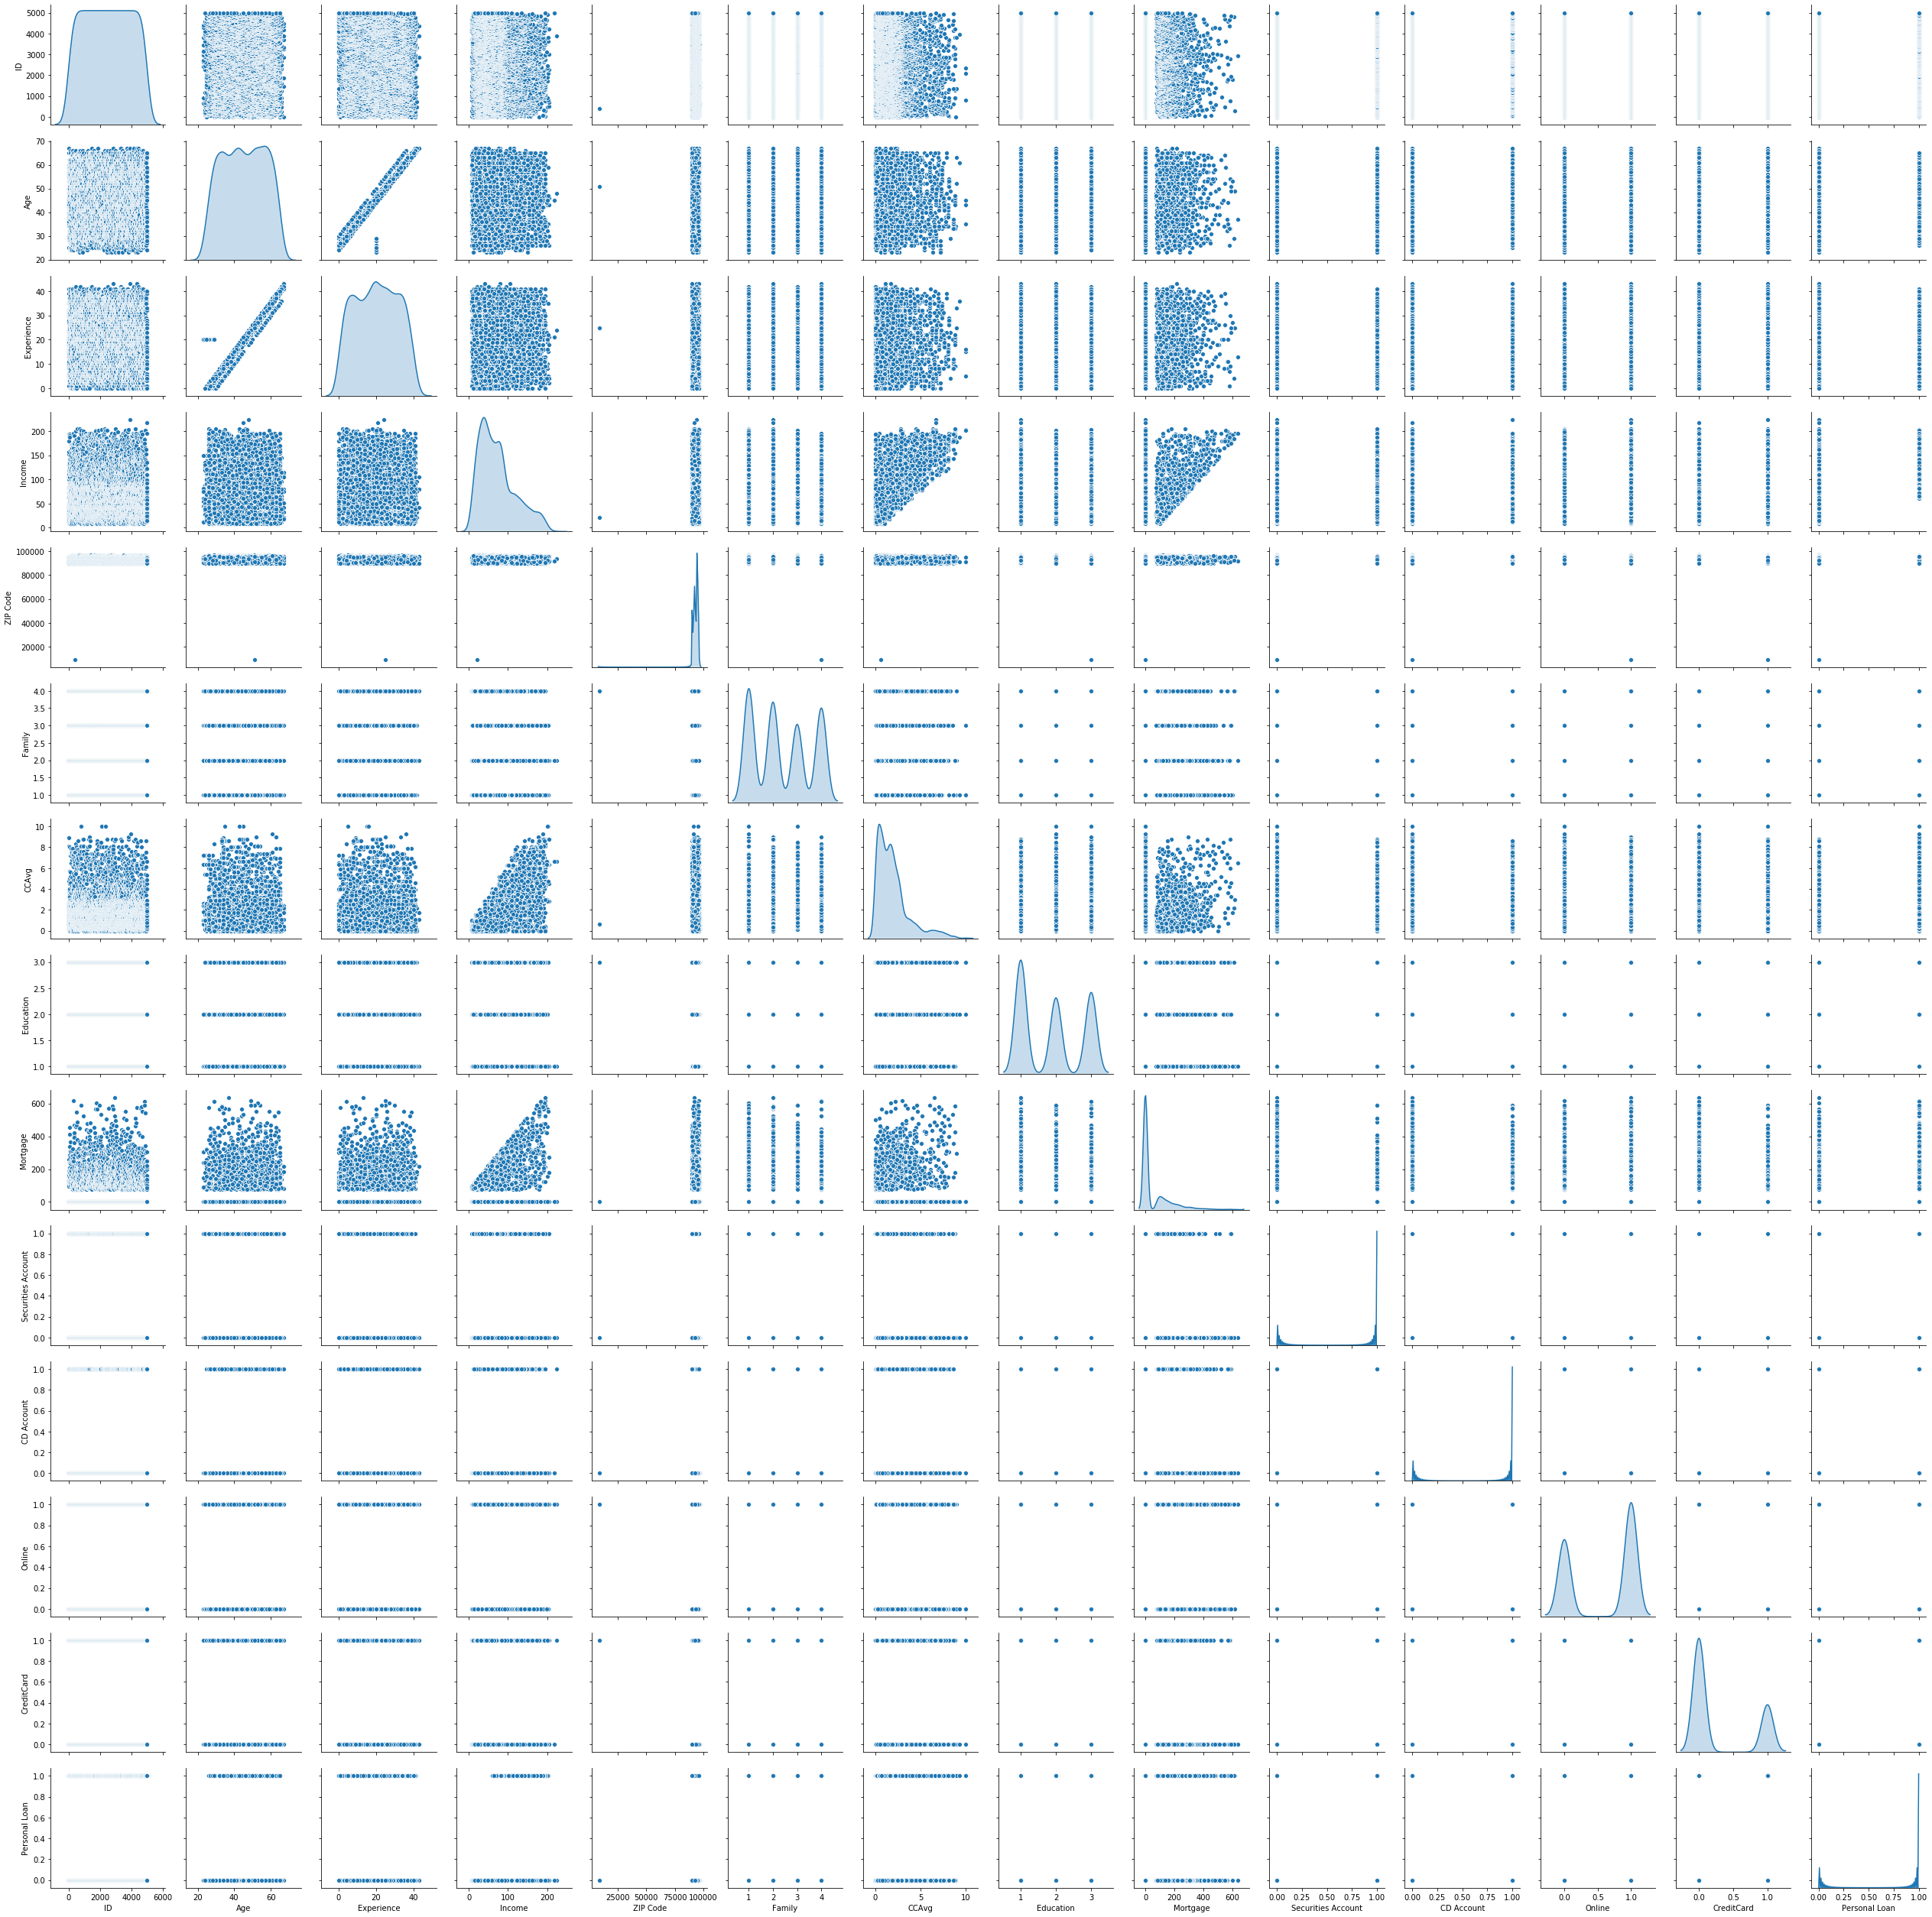

In [327]:
sns.pairplot(data =df_Bank,diag_kind ='kde')

#### Question2: Study the data distribution in each attribute, share your findings


1). ID: This attribute can be dropped.Though the data distribution is normal.

2). Age:Three small peaks can be indicating three values of age would be slightly more in number.However, the mean and median of the attribute is equal.The distribution is in considerable shape.

3). Eductaion : Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance.

4). Income : We can clearly see data is highly left skewed.Data for less income customers is more in the sample.

5). ZIP Code: The attribute has sharp peaks telling the data from particular places are collected more.Spread is also less in the sample. More data from different places can be collected.

6).Family: It has 4 peaks(4 values) , families with least member is highest in the sample.

7).Mortage: This attribute is highly left skewed with a very high peak on the left telling us that most customer are having least mortage while a very few have some mortage.

8).Securities Account : This attributes tells us that majorly cutomers are not having Security account.

9).CD account: Most of the customers dont have CDaccounts.

10).Online: Higher number of customers use online banking in the sample.

11).Credit Card: This attribute has less customers using CC in comparison to the CC users.

###### Relationship between the attributes:
Experience and age are in linear relationship. One can be dropped among them will not effect the accuracy.

In [328]:
df_Bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.000465,0.005526,0.013459,0.008834,-0.014013
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


#### Question 3: Get the target column distribution

In [329]:
# 0 = didnt take loan in the last campaign (90.4%)
# 1 = took loan in the last campaign (9.6%)
df_Bank["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

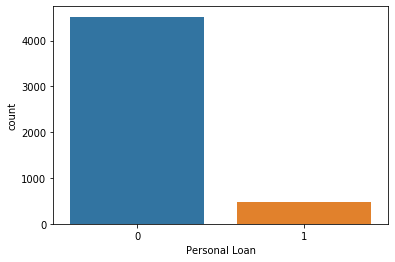

In [330]:
sns.countplot(df_Bank["Personal Loan"])

In [331]:
#sns.swarmplot(data=df_Bank['Personal Loan'])

In [332]:
Not_taken_loan = len(df_Bank[df_Bank['Personal Loan']==0])
print('Not taken loan :',Not_taken_loan)
Taken_loan = len(df_Bank[df_Bank['Personal Loan']==1])
print('Taken loan :',Taken_loan)
percentage_no_loan = Not_taken_loan/(Not_taken_loan+Taken_loan)
print("percentage of NO_Loan is", percentage_no_loan*100)
percentage_loan = Taken_loan/(Not_taken_loan+Taken_loan)
print("percentage of Loan", percentage_loan*100)

Not taken loan : 4520
Taken loan : 480
percentage of NO_Loan is 90.4
percentage of Loan 9.6


###### Looking into the distribution to the various attributes in relation with the target

In [333]:
df_Bank.groupby(df_Bank['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.378982,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917



Observations:

1). The average Income of customers who took loan is more than double of the avg income of customers who didn’t take loan last year.

2). The Avg. spending on credit cards per month ($000) is also more than double for the customer's who took loan.

3). The average mortage for loan availing customers is approximately double for the not availing customers.

4). Avg literacy is less for non loan takers.

As given in the data description that person who took loan in the last camping is 9.6%.

In [334]:
#Looking at the attributes where the variance is less than 1
a = df_Bank.var()
a[a<1]

Education             0.705380
Securities Account    0.093519
CD Account            0.056763
Online                0.240678
CreditCard            0.207606
Personal Loan         0.086801
dtype: float64

Experience and age is having a good corelation. One among them can be dropped. Target is having comparetively better relation with Income.

In [335]:
df_Bank.drop(['Experience','ID'],inplace=True, axis=1)

In [336]:
df_Bank.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0


#### Question 4: Split the data into training and test set in the ratio of 70:30 respectively

In [337]:
array = df_Bank
X= array.iloc[:,0:11]    #contains all the rows and upto 10th column, excludes Personal Loan column
y= array.iloc[:,11]      #contains only Target column, i.e Personal Loan column

In [338]:
X.shape #independent variables

(5000, 11)

In [339]:
y.shape  #dependent variables

(5000,)

In [340]:
standardized_X = preprocessing.scale(X)
standardized_X


#stats.zscore(X)
#above standardized or ststs.zscore will give you same values in output

array([[-1.77441684, -0.53822878, -0.96411408, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 , -1.44393158, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301,  0.73881384, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.0610391 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878, -1.46985492, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396, -0.25475717, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [341]:
#normalize the data attributes
normalized_X = preprocessing.normalize(X)

### Recursive Feature Elimination

data_final_vars=data_final.columns.values.tolist() y=['y'] X=[i for i in data_final_vars if i not in y] from sklearn.feature_selection import RFE from sklearn.linear_model import LogisticRegression logreg = LogisticRegression() rfe = RFE(logreg, 20) rfe = rfe.fit(os_data_X, os_datay.values.ravel()) print(rfe.support) print(rfe.ranking_)

cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] X=os_data_X[cols] y=os_data_y['y']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [343]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [344]:
#for every test dat point, predict it's label based on 5 nearest neighbors in this model.
#The majority class will be assigned to the test data point

predicted_labels=NNH.predict(X_test)

NNH.score(X_test, y_test)

0.894

In [345]:
#calculating accuracy measures and confusion matrix

print(metrics.confusion_matrix(y_test,predicted_labels))

[[1306   45]
 [ 114   35]]


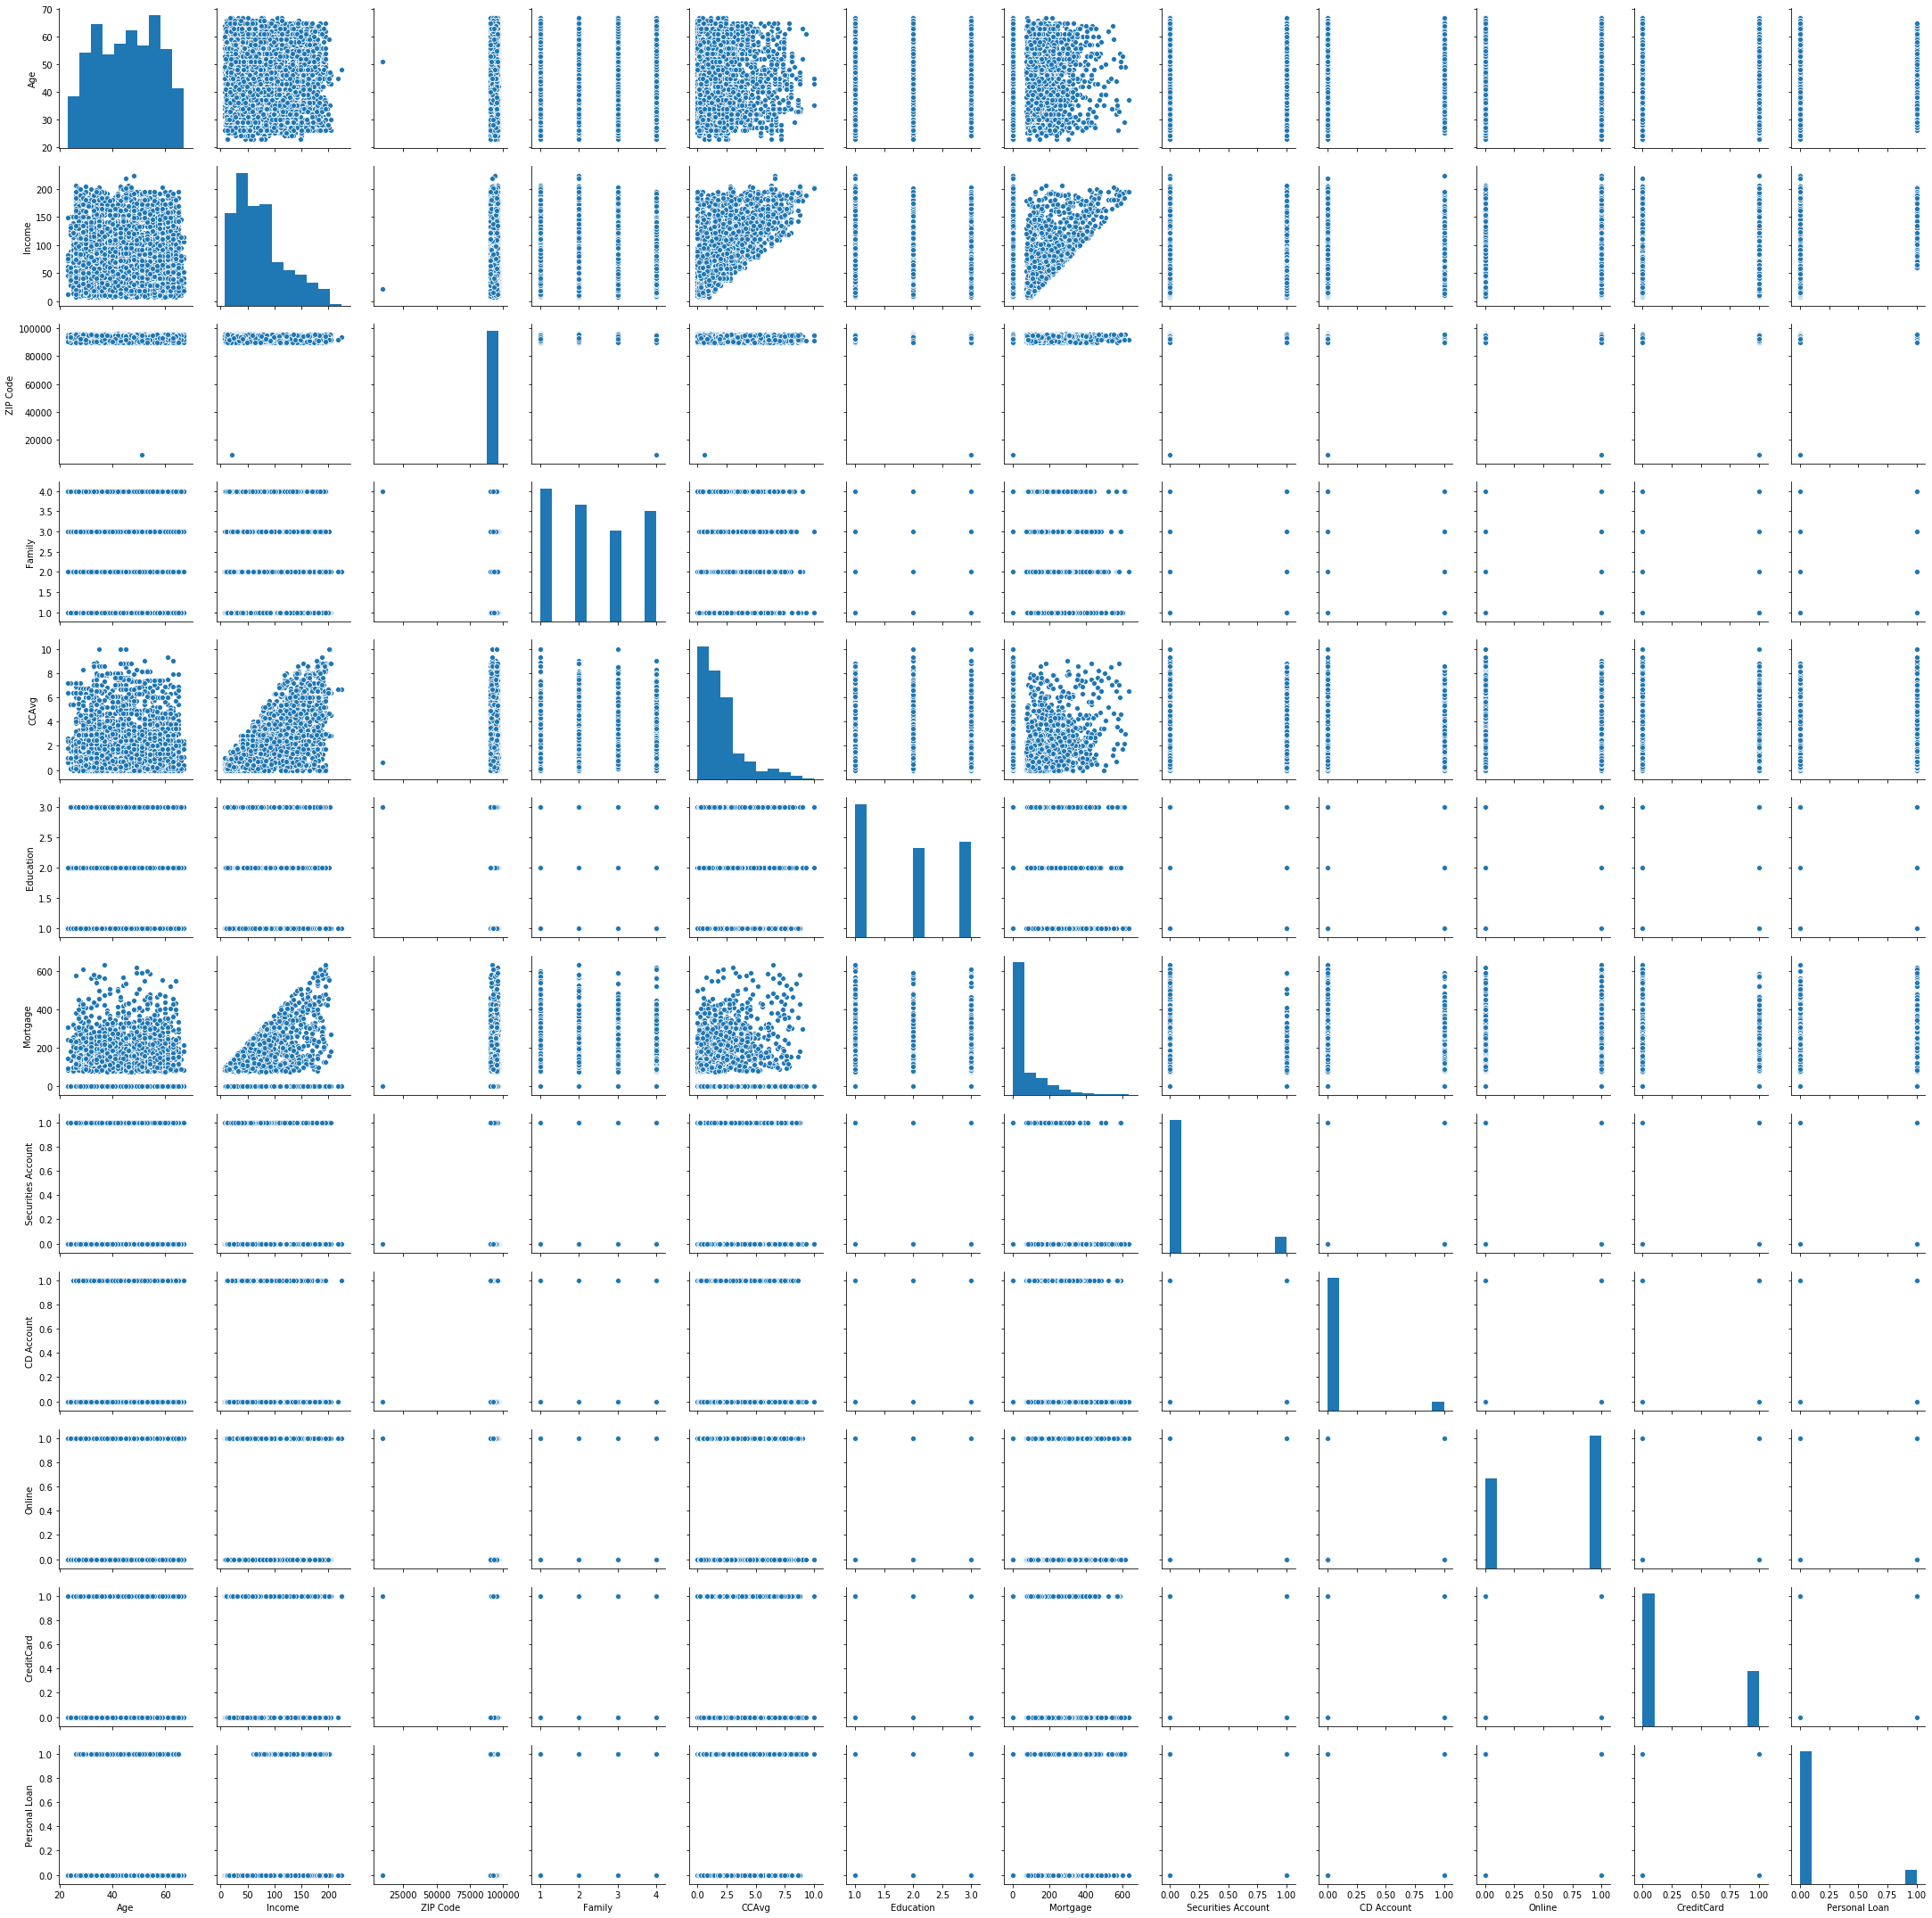

In [346]:
#let us analyse different attiributes for distribution and correlation using scatter matrix

sns.pairplot(df_Bank)

In [347]:
#df_Bank.drop(['ZIP Code'],inplace=True)

df_Bank.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0


In [348]:
df_Bank.drop(['ZIP Code'],inplace=True,axis=1)
df_Bank.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0


In [349]:
array = df_Bank
X= array.iloc[:,0:10]    #contains all the rows and upto 10th column, excludes Personal Loan column
y= array.iloc[:,10]      #contains only Target column, i.e Personal Loan column

In [350]:
standardized_X = preprocessing.scale(X)
standardized_X

array([[-1.77441684, -0.53822878,  1.39741398, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 ,  0.52599094, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301, -1.21685513, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.34543209, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878,  0.52599094, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396,  0.52599094, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [351]:
normalized_X = preprocessing.normalize(X)

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [353]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [354]:
#for every test dat point, predict it's label based on 5 nearest neighbors in this model.
#The majority class will be assigned to the test data point

predicted_labels=NNH.predict(X_test)

NNH.score(X_test, y_test)

0.9073333333333333

In [355]:
#calculating accuracy measures and confusion matrix

print(metrics.confusion_matrix(y_test,predicted_labels))

[[1308   43]
 [  96   53]]


#### Question 5: Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 

#### and

#### 6.Print the confusion matrix for all the above models (5 points)

###### Answer:

###### Here we are using logistic, K-NN,  Naive Bayes to predict and evaluate data. We are also printing their confusion matrix simultaniously for better Understanding

###### Logistic model

In [356]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\highm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [357]:
y_pred = logreg.predict(X_test)

In [358]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.95


In [359]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


###### Confusion Matrix

In [360]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1338   13]
 [  73   76]]



The result is telling us that we have 6124+5170 correct predictions and 2505+1542 incorrect predictions.


Compute precision, recall, F-measure and support

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



Interpretation: Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted

###### ROC Curve

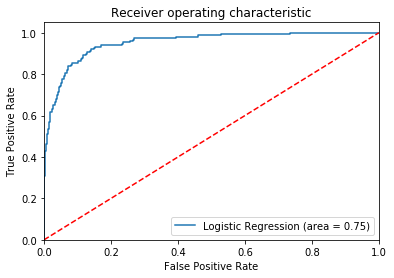

In [362]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [363]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.218847
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.308      
Dependent Variable:  Personal Loan    AIC:              2208.4694  
Date:                2020-04-08 21:52 BIC:              2273.6414  
No. Observations:    5000             Log-Likelihood:   -1094.2    
Df Model:            9                LL-Null:          -1581.0    
Df Residuals:        4990             LLR p-value:      8.6053e-204
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0970   0.0045 -21.4914 0.0000 -0.1058 -0.0881
Income              0.0242   0.0015  16.6

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them

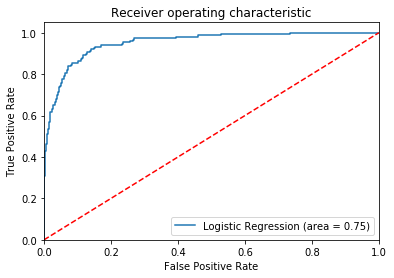

In [364]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Build KNN Model

In [365]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [366]:
y_pred = classifier.predict(X_test)

In [367]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.94


In [368]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [369]:

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

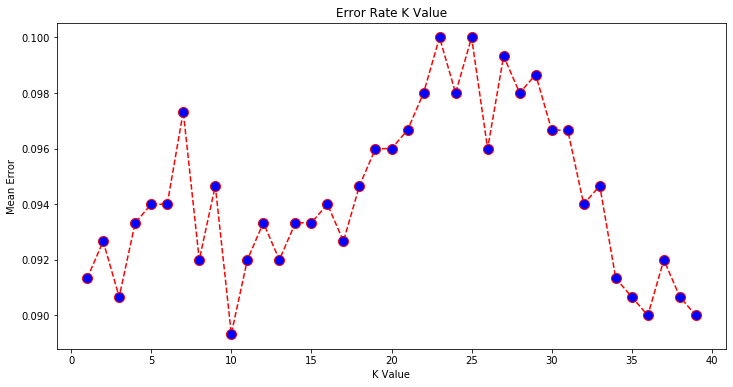

In [370]:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Naive Bayes Classification

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


Evaluating Model

In [ ]:
#print("Accuracy on test set:",metrics.accuracy_score(X_train,y_train))
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Text(91.68, 0.5, 'predicted label')

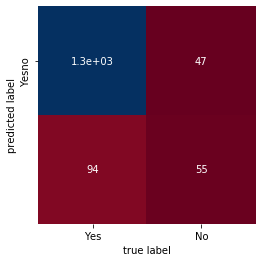

In [372]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [373]:
cm

array([[1304,   47],
       [  94,   55]], dtype=int64)

In [374]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.54      0.37      0.44       149

    accuracy                           0.91      1500
   macro avg       0.74      0.67      0.69      1500
weighted avg       0.89      0.91      0.90      1500



Precision :
Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is     defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances positive, what percent was correct.

Recall :
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true         positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly.

f1 score :
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.         Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

support :
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data     may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

#### 7.  Give your reasoning on which is the best model in this case and why it performs better?

The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.

The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.

The Naive Bayes giving the accuracy less in comparision to other models meaning the probability of determing the target correctly is less